In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Refer to: [https://github.com/uci-ml-repo/ucimlrepo](https://github.com/uci-ml-repo/ucimlrepo)

In [2]:
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=296)

/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [3]:
data = dataset.data.original.copy()
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Context

In [4]:
dataset.metadata.abstract

'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.\n'

In [5]:
dataset.metadata.intro_paper

{'ID': 225,
 'type': 'NATIVE',
 'title': 'Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record',
 'authors': 'Beata Strack, Jonathan DeShazo, Chris Gennings, Juan Olmo, Sebastian Ventura, Krzysztof Cios, John Clore',
 'venue': 'BioMed Research International, vol. 2014',
 'year': 2014,
 'journal': None,
 'DOI': None,
 'URL': 'https://www.hindawi.com/journals/bmri/2014/781670/',
 'sha': None,
 'corpus': None,
 'arxiv': None,
 'mag': None,
 'acl': None,
 'pmid': None,
 'pmcid': None}

In [6]:
dataset.metadata.repository_url

'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008'

In [7]:
dataset.variables

,name,role,type,demographic,description,units,missing_values
0,encounter_id,ID,,None,Unique identifier of an encounter,None,no
1,patient_nbr,ID,,None,Unique identifier of a patient,None,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",None,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",None,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",None,no
5,weight,Feature,Categorical,None,Weight in pounds.,None,yes
6,admission_type_id,Feature,Categorical,None,Integer identifier corresponding to 9 distinct...,None,no
7,discharge_disposition_id,Feature,Categorical,None,Integer identifier corresponding to 29 distinc...,None,no
8,admission_source_id,Feature,Categorical,None,Integer identifier corresponding to 21 distinc...,None,no
9,time_in_hospital,Feature,Integer,None,Integer number of days between admission and d...,None,no


## Outcome Distribution

In [8]:
data["readmitted"] = data["readmitted"].astype('category')
outcome_value_counts = data["readmitted"].value_counts()
outcome_value_counts

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

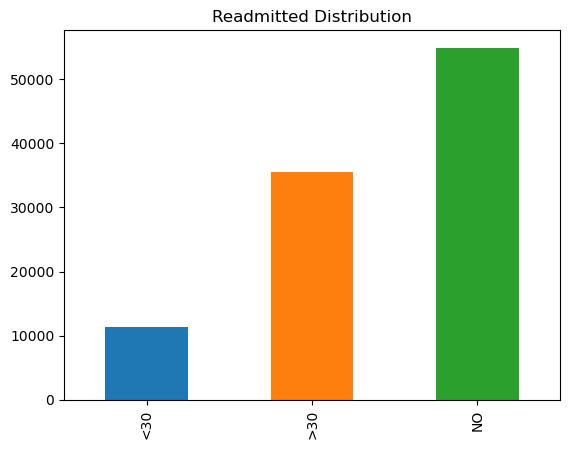

In [9]:
data["readmitted"] = data["readmitted"].cat.reorder_categories(["<30", ">30", "NO"])
data["readmitted"].value_counts().reindex(data["readmitted"].cat.categories).plot(kind="bar", title="Readmitted Distribution", color=['#1f77b4', '#ff7f0e', '#2ca02c']);

## Data Completeness

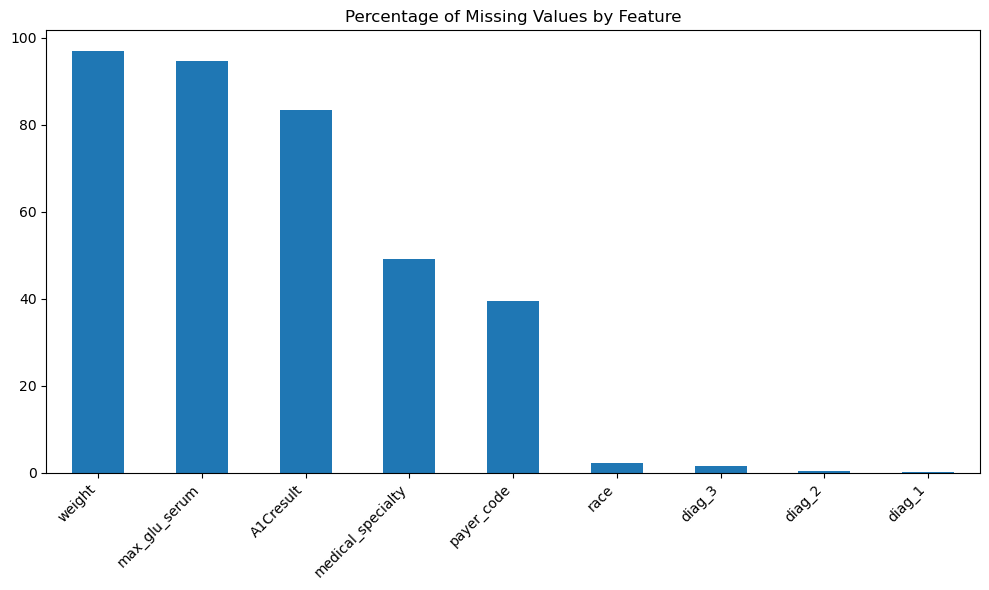

In [10]:
missing_count = data.isnull().sum()
missing_pct = (missing_count / len(data)) * 100
missing_stats = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values('missing_pct', ascending=False)

plt.figure(figsize=(10, 6))
missing_stats[missing_stats['missing_pct'] > 0]['missing_pct'].plot(kind='bar')
plt.title('Percentage of Missing Values by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


## Readmission Distribution

In [11]:
targets_oh = pd.get_dummies(dataset.data.targets, dtype=int)

In [12]:
grouped_by_patient = data.groupby("patient_nbr")
targets_oh_grouped_by_patient = targets_oh.groupby(data["patient_nbr"])
by_patient = pd.DataFrame({
    "encounters": grouped_by_patient["encounter_id"].count(),
    "readmitted_<30": targets_oh_grouped_by_patient["readmitted_<30"].mean(),
    "readmitted_>30": targets_oh_grouped_by_patient["readmitted_>30"].mean(),
    "readmitted_NO": targets_oh_grouped_by_patient["readmitted_NO"].mean(),
    "time_in_hospital": grouped_by_patient["time_in_hospital"].mean(),
})

In [13]:
by_patient["encounters"].describe()

count    71518.000000
mean         1.422942
std          1.090740
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         40.000000
Name: encounters, dtype: float64

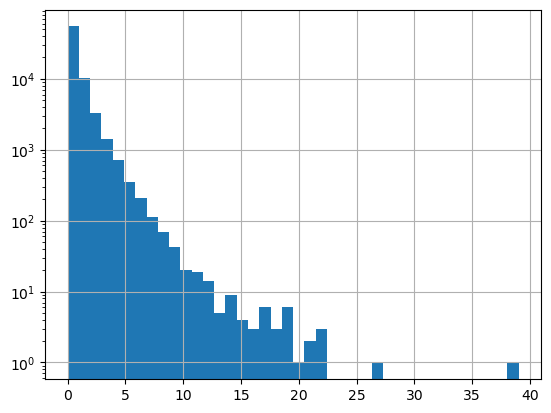

In [14]:
max_patient_encounters = by_patient["encounters"].max()
(by_patient["encounters"] - 1).hist(bins=max_patient_encounters, log=True);

In [15]:
rep_max_patient = by_patient[by_patient["encounters"] == max_patient_encounters].index[0]
data[data["patient_nbr"] == rep_max_patient]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),NaN,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),NaN,3,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),NaN,2,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),NaN,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),NaN,2,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,<30


## Distributions (by Demographics)

In [16]:
data["race"] = data["race"].astype('category')
data["gender"] = data["gender"].astype('category')
data["age"] = data["age"].astype('category')

In [17]:
demographic_weight = 1 / data["patient_nbr"].map(by_patient["encounters"])

weighted_target_oh = targets_oh.mul(demographic_weight, axis=0)

def get_outcome_by_feature(name, sorted=False, patient_weighted=False):
    # Group by feature and sum the weighted one-hot columns
    outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(
    ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)

    if not sorted:
        return outcome_by_feature

    # Sort by total counts if requested
    counts = data[name].value_counts().sort_values(ascending=False)
    return outcome_by_feature.reindex(counts.index)

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(


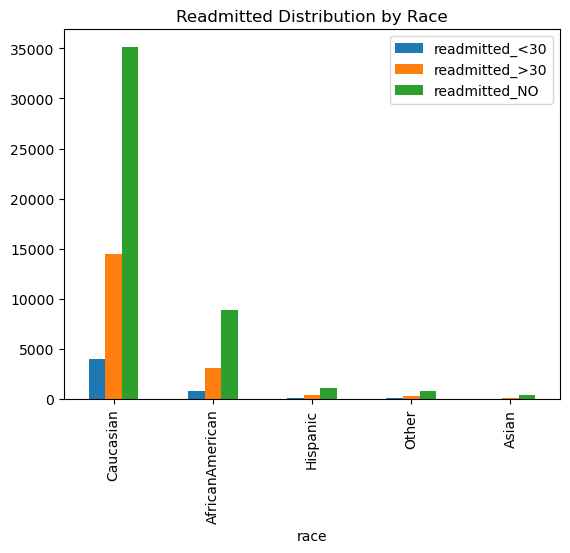

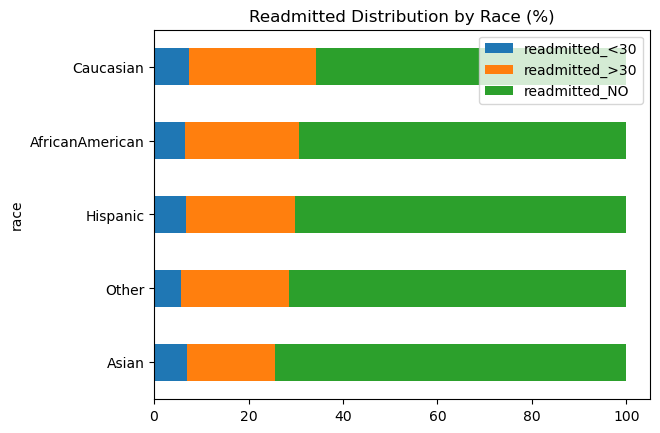

In [18]:
outcome_by_race = get_outcome_by_feature("race", sorted=True, patient_weighted=True)
outcome_by_race.plot(kind="bar", title="Readmitted Distribution by Race");
outcome_by_race_pct = outcome_by_race.div(outcome_by_race.sum(axis=1), axis=0) * 100
outcome_by_race_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Race (%)");

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/133961175.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


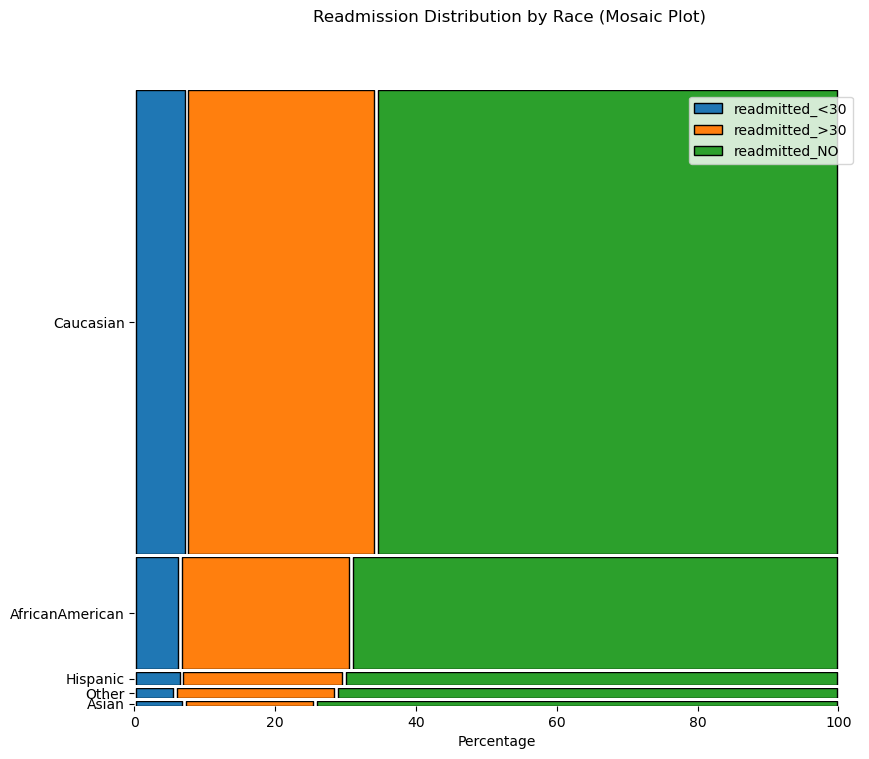

In [19]:
from matplotlib import gridspec

# Get raw counts for race distribution
race_counts = outcome_by_race.sum(axis=1)
race_proportions = race_counts / race_counts.sum()

# Create figure with custom height ratios based on race proportions
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(len(race_counts), 3, height_ratios=race_proportions, hspace=0.025)

# Plot each race as a row
for i, (race, proportion) in enumerate(race_proportions.items()):
    ax = plt.subplot(gs[i, :])
    
    # Get readmission proportions for this race
    race_data = outcome_by_race_pct.loc[race]
    
    # Plot stacked bars with gaps between categories
    left = 0
    gap_size = 0.5  # Gap between segments as percentage
    for j, (col, val) in enumerate(race_data.items()):
        ax.barh(0, val - gap_size, left=left + gap_size / 2, height=1, label=col.replace('weighted_readmitted_', ''), 
                edgecolor='black', linewidth=1)
        left += val
    
    # Customize appearance
    ax.set_yticks([0])
    ax.set_yticklabels([race])
    if i < len(race_counts)-1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Percentage')
    ax.set_xlim(0, 100 + (len(race_data) - 1) * (gap_size + 1))
    ax.set_ylim(-0.5, 0.5)
    # Remove grid lines and subplot borders
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.suptitle('Readmission Distribution by Race (Mosaic Plot)')
# Set legend on the first subplot to position it relative to the top
first_ax = plt.subplot(gs[0, :])
first_ax.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/3292605319.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


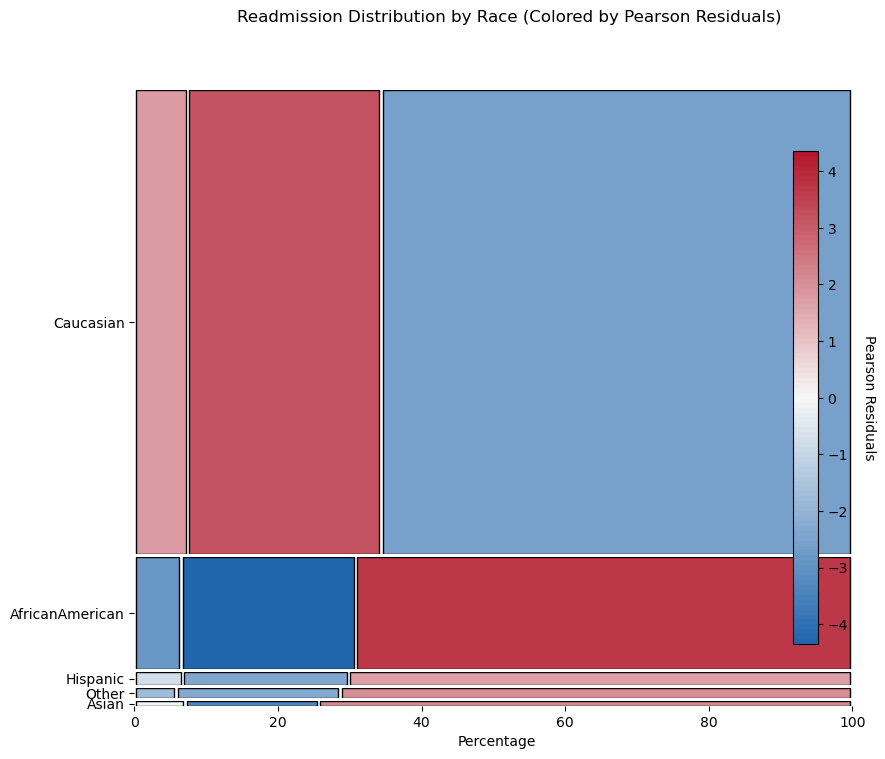

In [20]:
# Mosaic plot colored by Pearson residuals
from matplotlib import gridspec
from scipy.stats import chi2_contingency

# Calculate Pearson residuals for race vs readmission
contingency_table = pd.crosstab(
    data['race'], 
    data['readmitted'],
    values=demographic_weight,
    aggfunc='sum'
)

# Calculate expected frequencies
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Calculate Pearson residuals
pearson_residuals = (contingency_table - expected) / np.sqrt(expected)

# Get raw counts for race distribution
race_counts = outcome_by_race.sum(axis=1)
race_proportions = race_counts / race_counts.sum()

# Create figure with custom height ratios based on race proportions
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(len(race_counts), 3, height_ratios=race_proportions, hspace=0.025)

# Create colormap for residuals (red for positive, blue for negative)
from matplotlib.colors import LinearSegmentedColormap
colors = ['#2166ac', '#f7f7f7', '#b2182b']  # Blue to white to red
n_bins = 100
cmap = LinearSegmentedColormap.from_list('residual', colors, N=n_bins)

# Get min and max residuals for normalization
residual_min = pearson_residuals.min().min()
residual_max = pearson_residuals.max().max()
max_abs_residual = max(abs(residual_min), abs(residual_max))

# Plot each race as a row
for i, (race, proportion) in enumerate(race_proportions.items()):
    ax = plt.subplot(gs[i, :])
    
    # Get readmission proportions for this race
    race_data = outcome_by_race_pct.loc[race]
    
    # Plot stacked bars with gaps between categories, colored by residuals
    left = 0
    gap_size = 0.5  # Gap between segments as percentage
    for j, (col, val) in enumerate(race_data.items()):
        # Get the residual for this race-readmission combination
        readmission_cat = col.replace('readmitted_', '')
        residual = pearson_residuals.loc[race, readmission_cat]
        
        # Normalize residual to 0-1 range for colormap
        normalized_residual = (residual + max_abs_residual) / (2 * max_abs_residual)
        color = cmap(normalized_residual)
        
        ax.barh(0, val - gap_size, left=left + gap_size / 2, height=1, color=color, 
                edgecolor='black', linewidth=1)
        left += val
    
    # Customize appearance
    ax.set_yticks([0])
    ax.set_yticklabels([race])
    if i < len(race_counts)-1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Percentage')
    ax.set_xlim(0, 100 + (len(race_data) - 1) * gap_size)
    ax.set_ylim(-0.5, 0.5)
    # Remove grid lines and subplot borders
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.suptitle('Readmission Distribution by Race (Colored by Pearson Residuals)')

# Add colorbar positioned relative to the figure
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-max_abs_residual, vmax=max_abs_residual))
sm.set_array([])
cbar = fig.colorbar(sm, ax=fig.get_axes(), shrink=0.8, pad=0.02)
cbar.set_label('Pearson Residuals', rotation=270, labelpad=20)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(


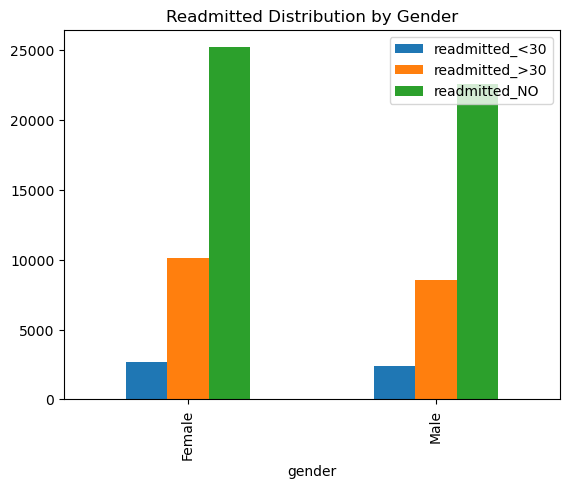

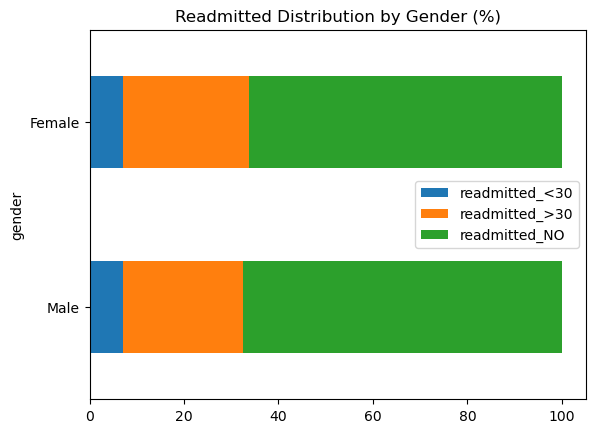

In [21]:
outcome_by_gender = get_outcome_by_feature("gender", sorted=True, patient_weighted=True).drop("Unknown/Invalid", errors="ignore")
outcome_by_gender.plot(kind="bar", title="Readmitted Distribution by Gender");
outcome_by_gender_pct = outcome_by_gender.div(outcome_by_gender.sum(axis=1), axis=0) * 100
outcome_by_gender_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Gender (%)");

In [22]:
print(data["age"].cat.categories)
data["age"] = data["age"].cat.reorder_categories(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'])

Index(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
      dtype='object')


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_feature = weighted_target_oh.groupby(data[name]).sum(


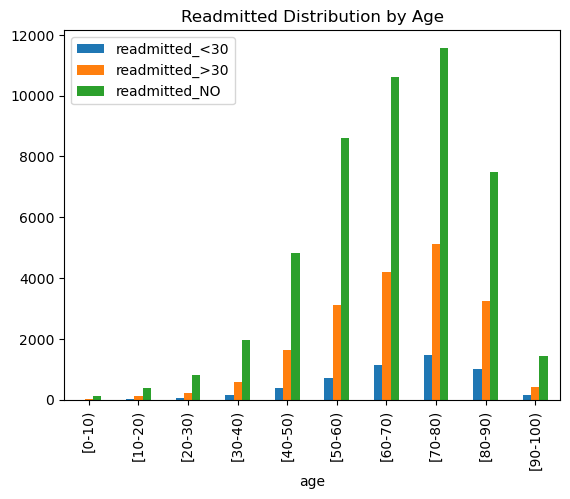

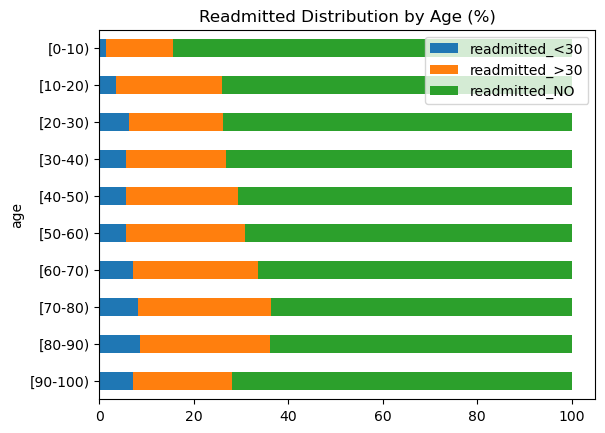

In [23]:
outcome_by_age = get_outcome_by_feature("age", patient_weighted=True)
outcome_by_age.plot(kind="bar", title="Readmitted Distribution by Age");
outcome_by_age_pct = outcome_by_age.div(outcome_by_age.sum(axis=1), axis=0) * 100
outcome_by_age_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Age (%)");

### Interaction Plot

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2369070257.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_totals = demographic_weight.groupby(data['race']).sum()


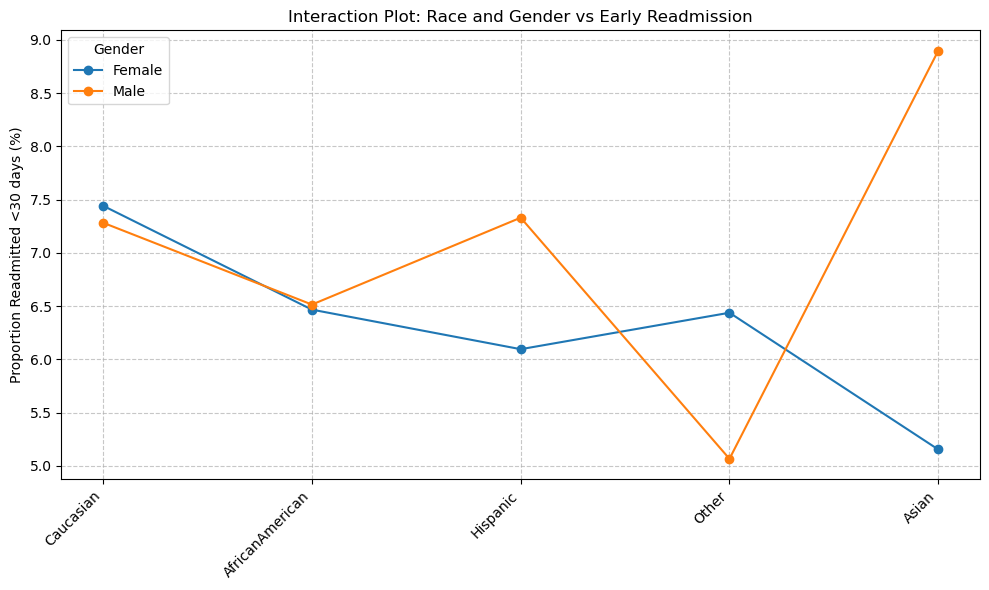

In [24]:
# Create a figure
plt.figure(figsize=(10, 6))

# Calculate proportion of readmission <30 days for each race-gender combination
prop_readmitted = pd.crosstab(
    [data['race'], data['gender']], 
    data['readmitted'] == '<30',
    values=demographic_weight,
    aggfunc='sum',
    normalize='index'
)[True]

# Reshape data for plotting and filter out Unknown/Invalid gender
prop_readmitted = prop_readmitted.unstack()
prop_readmitted = prop_readmitted.drop('Unknown/Invalid', axis=1)
prop_readmitted = prop_readmitted * 100

# Sort races by total prevalence (descending)
race_totals = demographic_weight.groupby(data['race']).sum()
race_order = race_totals.sort_values(ascending=False).index
prop_readmitted = prop_readmitted.reindex(race_order)

# Create interaction plot
for gender in prop_readmitted.columns:
    plt.plot(
        range(len(prop_readmitted.index)),
        prop_readmitted[gender],
        'o-',
        label=gender
    )

# Customize plot
plt.xticks(
    range(len(prop_readmitted.index)),
    prop_readmitted.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Proportion Readmitted <30 days (%)')
plt.title('Interaction Plot: Race and Gender vs Early Readmission')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout();


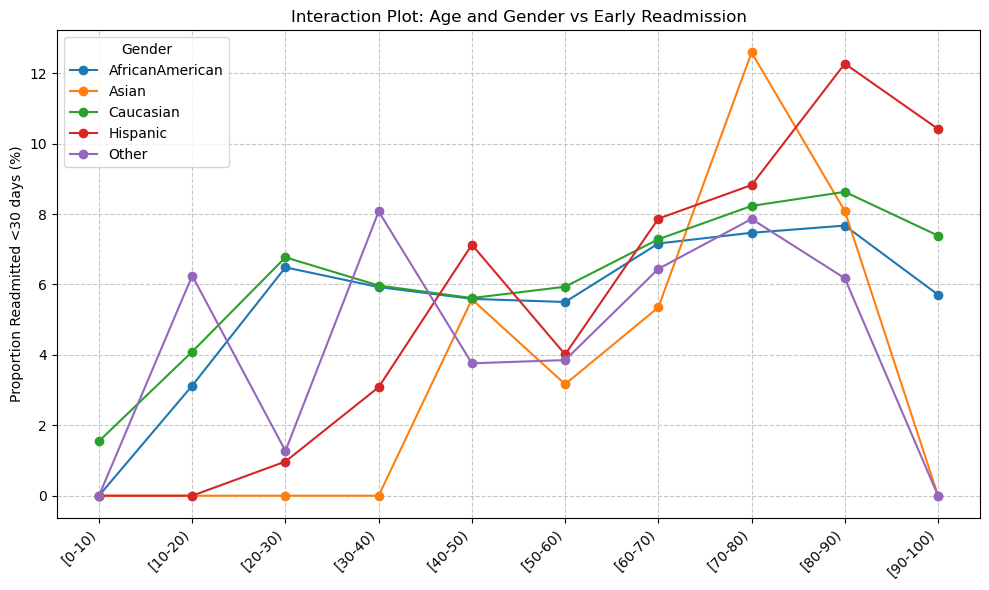

In [25]:
plt.figure(figsize=(10, 6))

# Calculate proportion of readmission <30 days for each age-gender combination
prop_readmitted = pd.crosstab(
    [data['age'], data['race']], 
    data['readmitted'] == '<30',
    values=demographic_weight,
    aggfunc='sum',
    normalize='index'
)[True]

# Reshape data for plotting and filter out Unknown/Invalid gender
prop_readmitted = prop_readmitted.unstack()
# prop_readmitted = prop_readmitted.drop('Unknown/Invalid', axis=1)
prop_readmitted = prop_readmitted * 100

# Create interaction plot
for gender in prop_readmitted.columns:
    plt.plot(
        range(len(prop_readmitted.index)),
        prop_readmitted[gender],
        'o-',
        label=gender
    )

# Customize plot
plt.xticks(
    range(len(prop_readmitted.index)),
    prop_readmitted.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Proportion Readmitted <30 days (%)')
plt.title('Interaction Plot: Age and Gender vs Early Readmission')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()


### Chi-squared Test

In [26]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(feature):
    """
    Perform chi-square test of independence 
    between demographic feature and readmission status,
    adjusted with demographic_weight
    """
    # Create contingency table weighted by demographic weights
    contingency_table = pd.crosstab(
        data[feature], 
        data['readmitted'],
        values=demographic_weight,
        aggfunc='sum'
    )
    
    # Perform chi-square test
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {feature} vs readmission status:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Contingency table:")
    print(contingency_table.round().astype(int))
    print()
    
    return chi2, p_value, contingency_table

# Perform chi-square tests
for feature in ["race", "gender", "age"]:
    perform_chi_square_test(feature)


Chi-square test for race vs readmission status:
Chi-square statistic: 98.2473
p-value: 0.0000
Degrees of freedom: 8
Contingency table:
readmitted        <30    >30     NO
race                               
AfricanAmerican   837   3135   8931
Asian              35     94    375
Caucasian        3942  14434  35141
Hispanic          101    350   1062
Other              67    268    836

Chi-square test for gender vs readmission status:
Chi-square statistic: 15.6053
p-value: 0.0036
Degrees of freedom: 4
Contingency table:
readmitted        <30    >30     NO
gender                             
Female           2712  10124  25188
Male             2374   8513  22603
Unknown/Invalid     0      0      3

Chi-square test for age vs readmission status:
Chi-square statistic: 389.0630
p-value: 0.0000
Degrees of freedom: 18
Contingency table:
readmitted   <30   >30     NO
age                          
[0-10)         2    22    130
[10-20)       19   119    392
[20-30)       69   224    824
[30-40) 

## By Admission Type, Admission Source & Discharge Disposition

In [27]:
data["admission_type_id"] = data["admission_type_id"].astype('category')
data["admission_source_id"] = data["admission_source_id"].astype('category')
data["discharge_disposition_id"] = data["discharge_disposition_id"].astype('category')

In [28]:
import json

with open('../data/metadata.json', 'r') as f:
    metadata = json.load(f)
    
admission_type_labels = {item['cat']: item['label'] for item in metadata['admission_type_labels']}
admission_source_labels = {item['cat']: item['label'] for item in metadata['admission_source_labels']}
discharge_disposition_labels = {item['cat']: item['label'] for item in metadata['discharge_disposition_labels']}


Source:
- https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


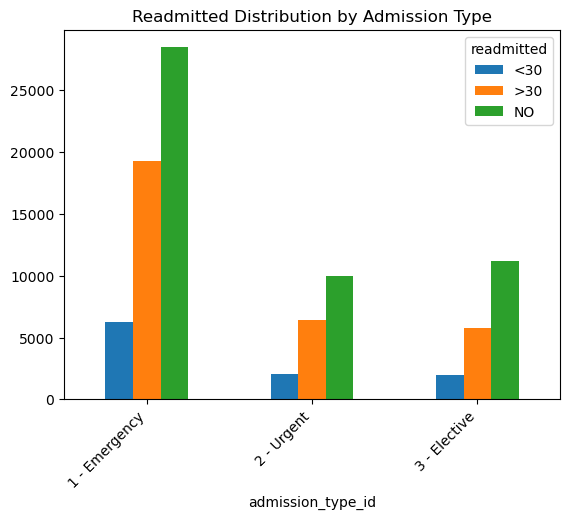

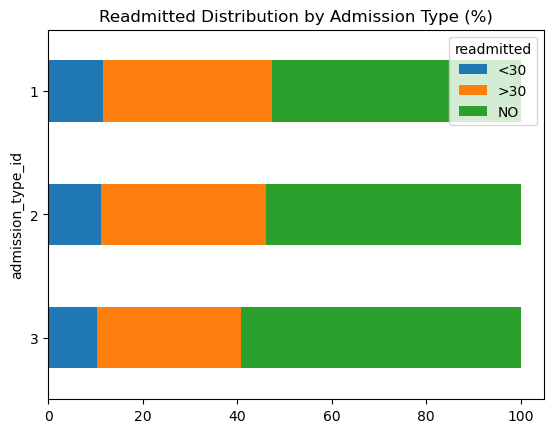

In [29]:
outcome_by_admission_type = get_outcome_by_feature("admission_type_id")
groups_to_keep = outcome_by_admission_type.index.isin([1, 2, 3])
outcome_by_admission_type_subset = outcome_by_admission_type[groups_to_keep]
# Create labels with code and description
labels = [f"{code} - {admission_type_labels[code]}" for code in outcome_by_admission_type_subset.index]
outcome_by_admission_type_subset.plot(kind="bar", title="Readmitted Distribution by Admission Type")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right');
outcome_by_admission_type_pct = outcome_by_admission_type_subset.div(outcome_by_admission_type_subset.sum(axis=1), axis=0) * 100
outcome_by_admission_type_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Admission Type (%)");

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


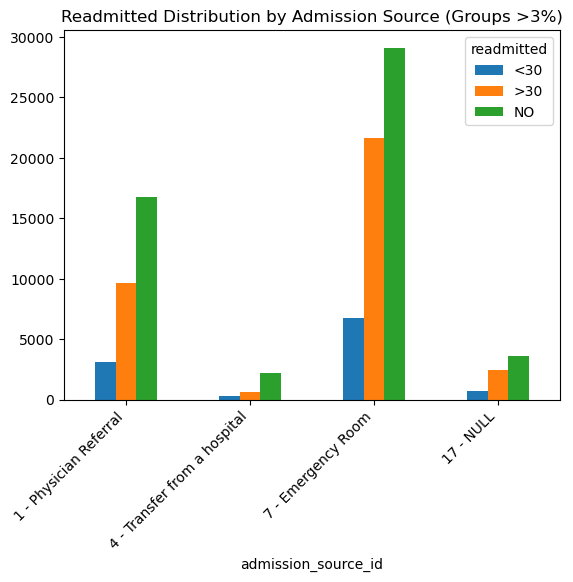

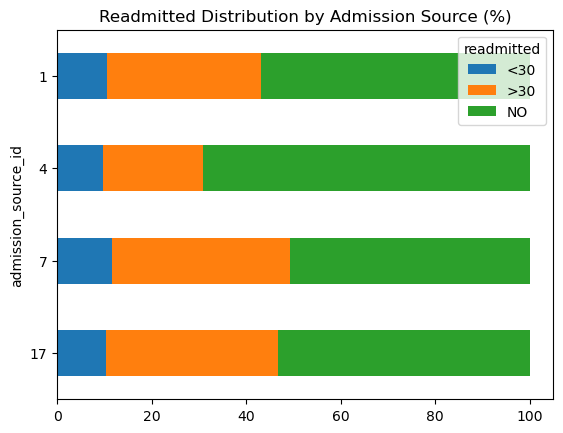

In [30]:
outcome_by_admission_source = get_outcome_by_feature("admission_source_id")
groups_to_keep = outcome_by_admission_source.sum(axis=1) / len(data) >= 0.03
outcome_by_admission_source_subset = outcome_by_admission_source[groups_to_keep]
# Create labels with code and description
labels = [f"{code} - {admission_source_labels[code]}" for code in outcome_by_admission_source_subset.index]
outcome_by_admission_source_subset.plot(kind="bar", title="Readmitted Distribution by Admission Source (Groups >3%)")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right');
outcome_by_admission_source_pct = outcome_by_admission_source_subset.div(outcome_by_admission_source_subset.sum(axis=1), axis=0) * 100
outcome_by_admission_source_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Admission Source (%)");

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


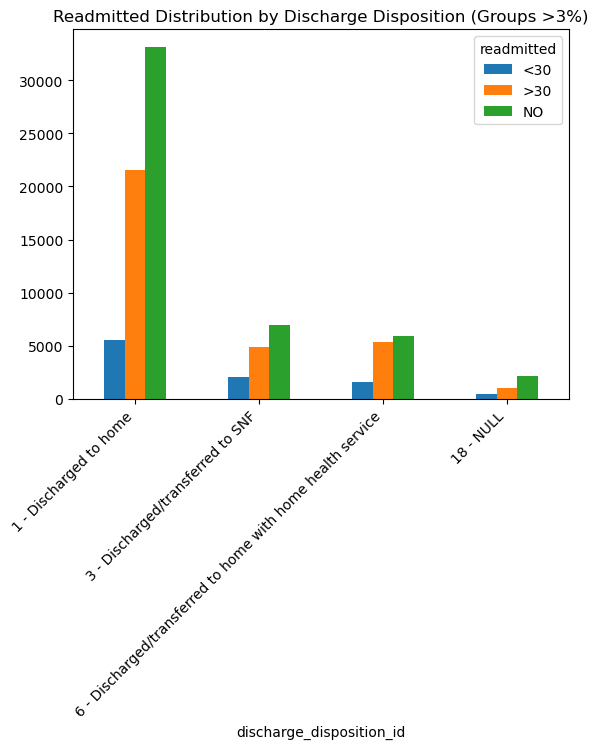

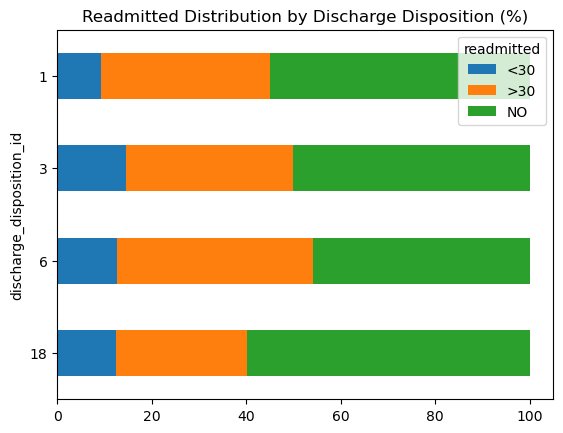

In [31]:
outcome_by_discharge_disposition = get_outcome_by_feature("discharge_disposition_id")
groups_to_keep = outcome_by_discharge_disposition.sum(axis=1) / len(data) >= 0.03
outcome_by_discharge_disposition_subset = outcome_by_discharge_disposition[groups_to_keep]
# Create labels with code and description
labels = [f"{code} - {discharge_disposition_labels[code]}" for code in outcome_by_discharge_disposition_subset.index]
outcome_by_discharge_disposition_subset.plot(kind="bar", title="Readmitted Distribution by Discharge Disposition (Groups >3%)")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right');
outcome_by_discharge_disposition_pct = outcome_by_discharge_disposition_subset.div(outcome_by_discharge_disposition_subset.sum(axis=1), axis=0) * 100
outcome_by_discharge_disposition_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Discharge Disposition (%)");

## Length of Stay / Number of Visits

In [32]:
data.groupby('readmitted')['time_in_hospital'].mean()

/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/3768296917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('readmitted')['time_in_hospital'].mean()


readmitted
<30    4.768249
>30    4.495541
NO     4.254429
Name: time_in_hospital, dtype: float64

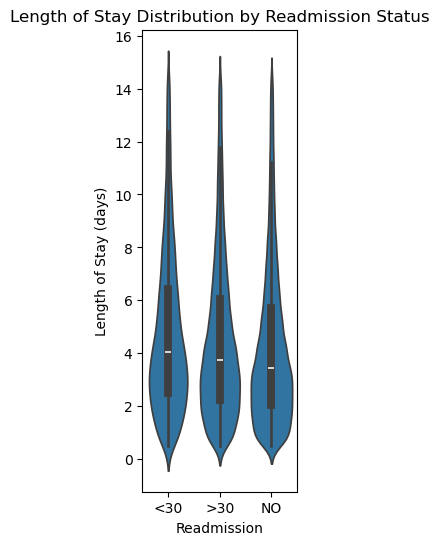

In [33]:
plt.figure(figsize=(2, 6))
jitter = np.random.uniform(-0.5, 0.5, len(data))
sns.violinplot(data=data, x='readmitted', y=data['time_in_hospital'] + jitter)
plt.title('Length of Stay Distribution by Readmission Status')
plt.xlabel('Readmission')
plt.ylabel('Length of Stay (days)')
plt.show()

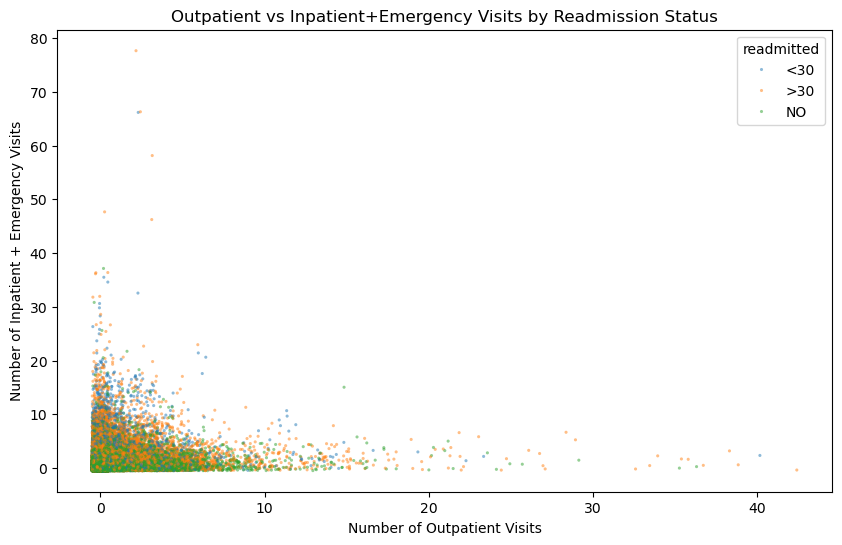

In [34]:
plt.figure(figsize=(10, 6))
# Add random jitter to integer coordinates to reduce overlap
x_jitter = np.random.uniform(-0.5, 0.5, len(data))
y_jitter = np.random.uniform(-0.5, 0.5, len(data))
sns.scatterplot(data=data, 
                x=data['number_outpatient'] + x_jitter,
                y=data['number_inpatient'] + data['number_emergency'] + y_jitter,
                hue='readmitted',
                alpha=0.5,
                linewidth=0,
                s=5)
plt.title('Outpatient vs Inpatient+Emergency Visits by Readmission Status')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Number of Inpatient + Emergency Visits')
plt.show()

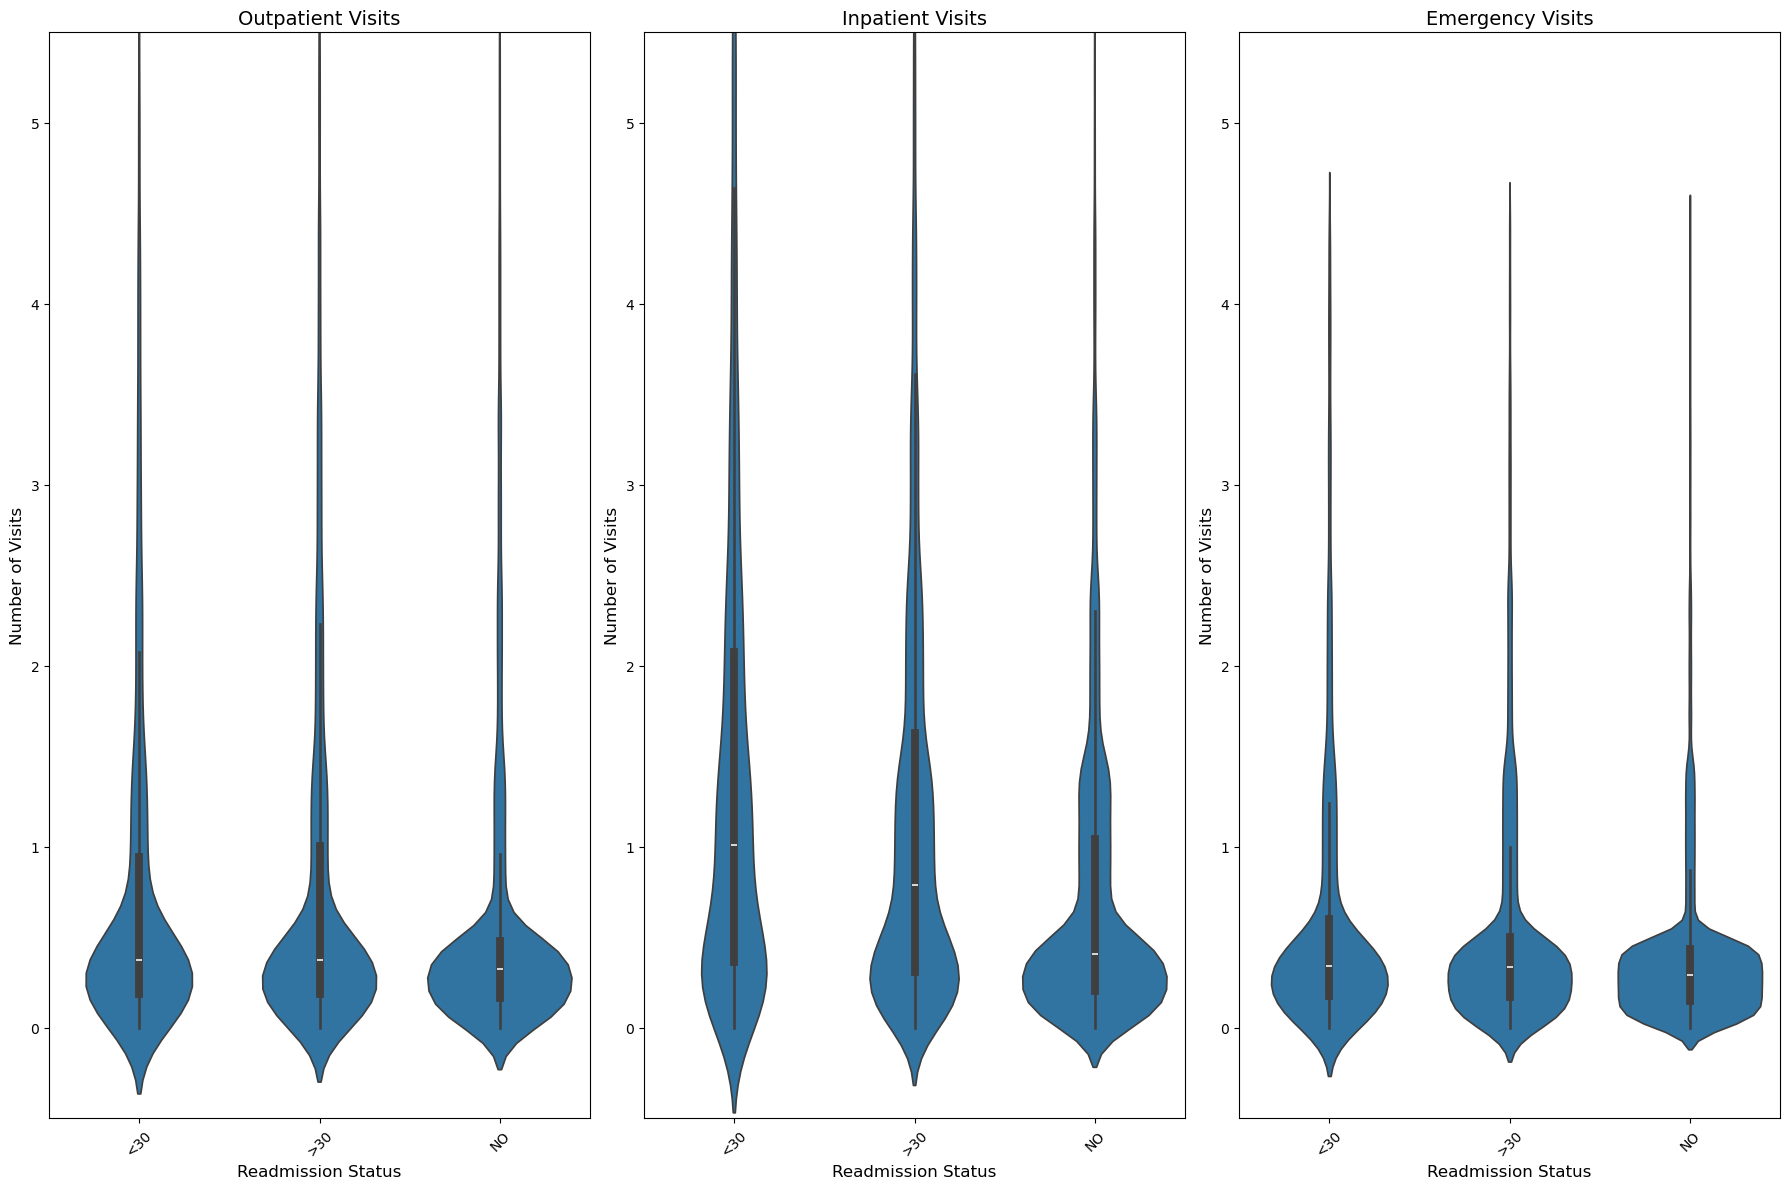

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

visit_types = ['number_outpatient', 'number_inpatient', 'number_emergency']
titles = ['Outpatient Visits', 'Inpatient Visits', 'Emergency Visits']

# First melt the data
melted_data = data.melt(
    id_vars=['readmitted'],
    value_vars=['number_outpatient', 'number_inpatient', 'number_emergency'],
    var_name='visit_type',
    value_name='number_of_visits'
)
# Add random jitter to reduce overlap
melted_data['number_of_visits'] = melted_data['number_of_visits'] + np.random.uniform(-0.5, 0.5, len(melted_data))

# Filter out zeros and top 1% in each visit type group
filtered_melted = melted_data[melted_data['number_of_visits'] > 0]
percentile_99 = filtered_melted.groupby('visit_type')['number_of_visits'].transform(lambda x: x.quantile(0.99))
filtered_melted = filtered_melted[filtered_melted['number_of_visits'] <= percentile_99]

for i, (visit_type, title) in enumerate(zip(visit_types, titles)):
    subset = filtered_melted[filtered_melted['visit_type'] == visit_type]
    
    sns.violinplot(data=subset, 
                   x='readmitted', 
                   y='number_of_visits',
                   ax=axes[i],
                   inner='box')
    axes[i].set_ylim(-0.5, 5.5)
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel('Readmission Status', fontsize=12)
    axes[i].set_ylabel('Number of Visits', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

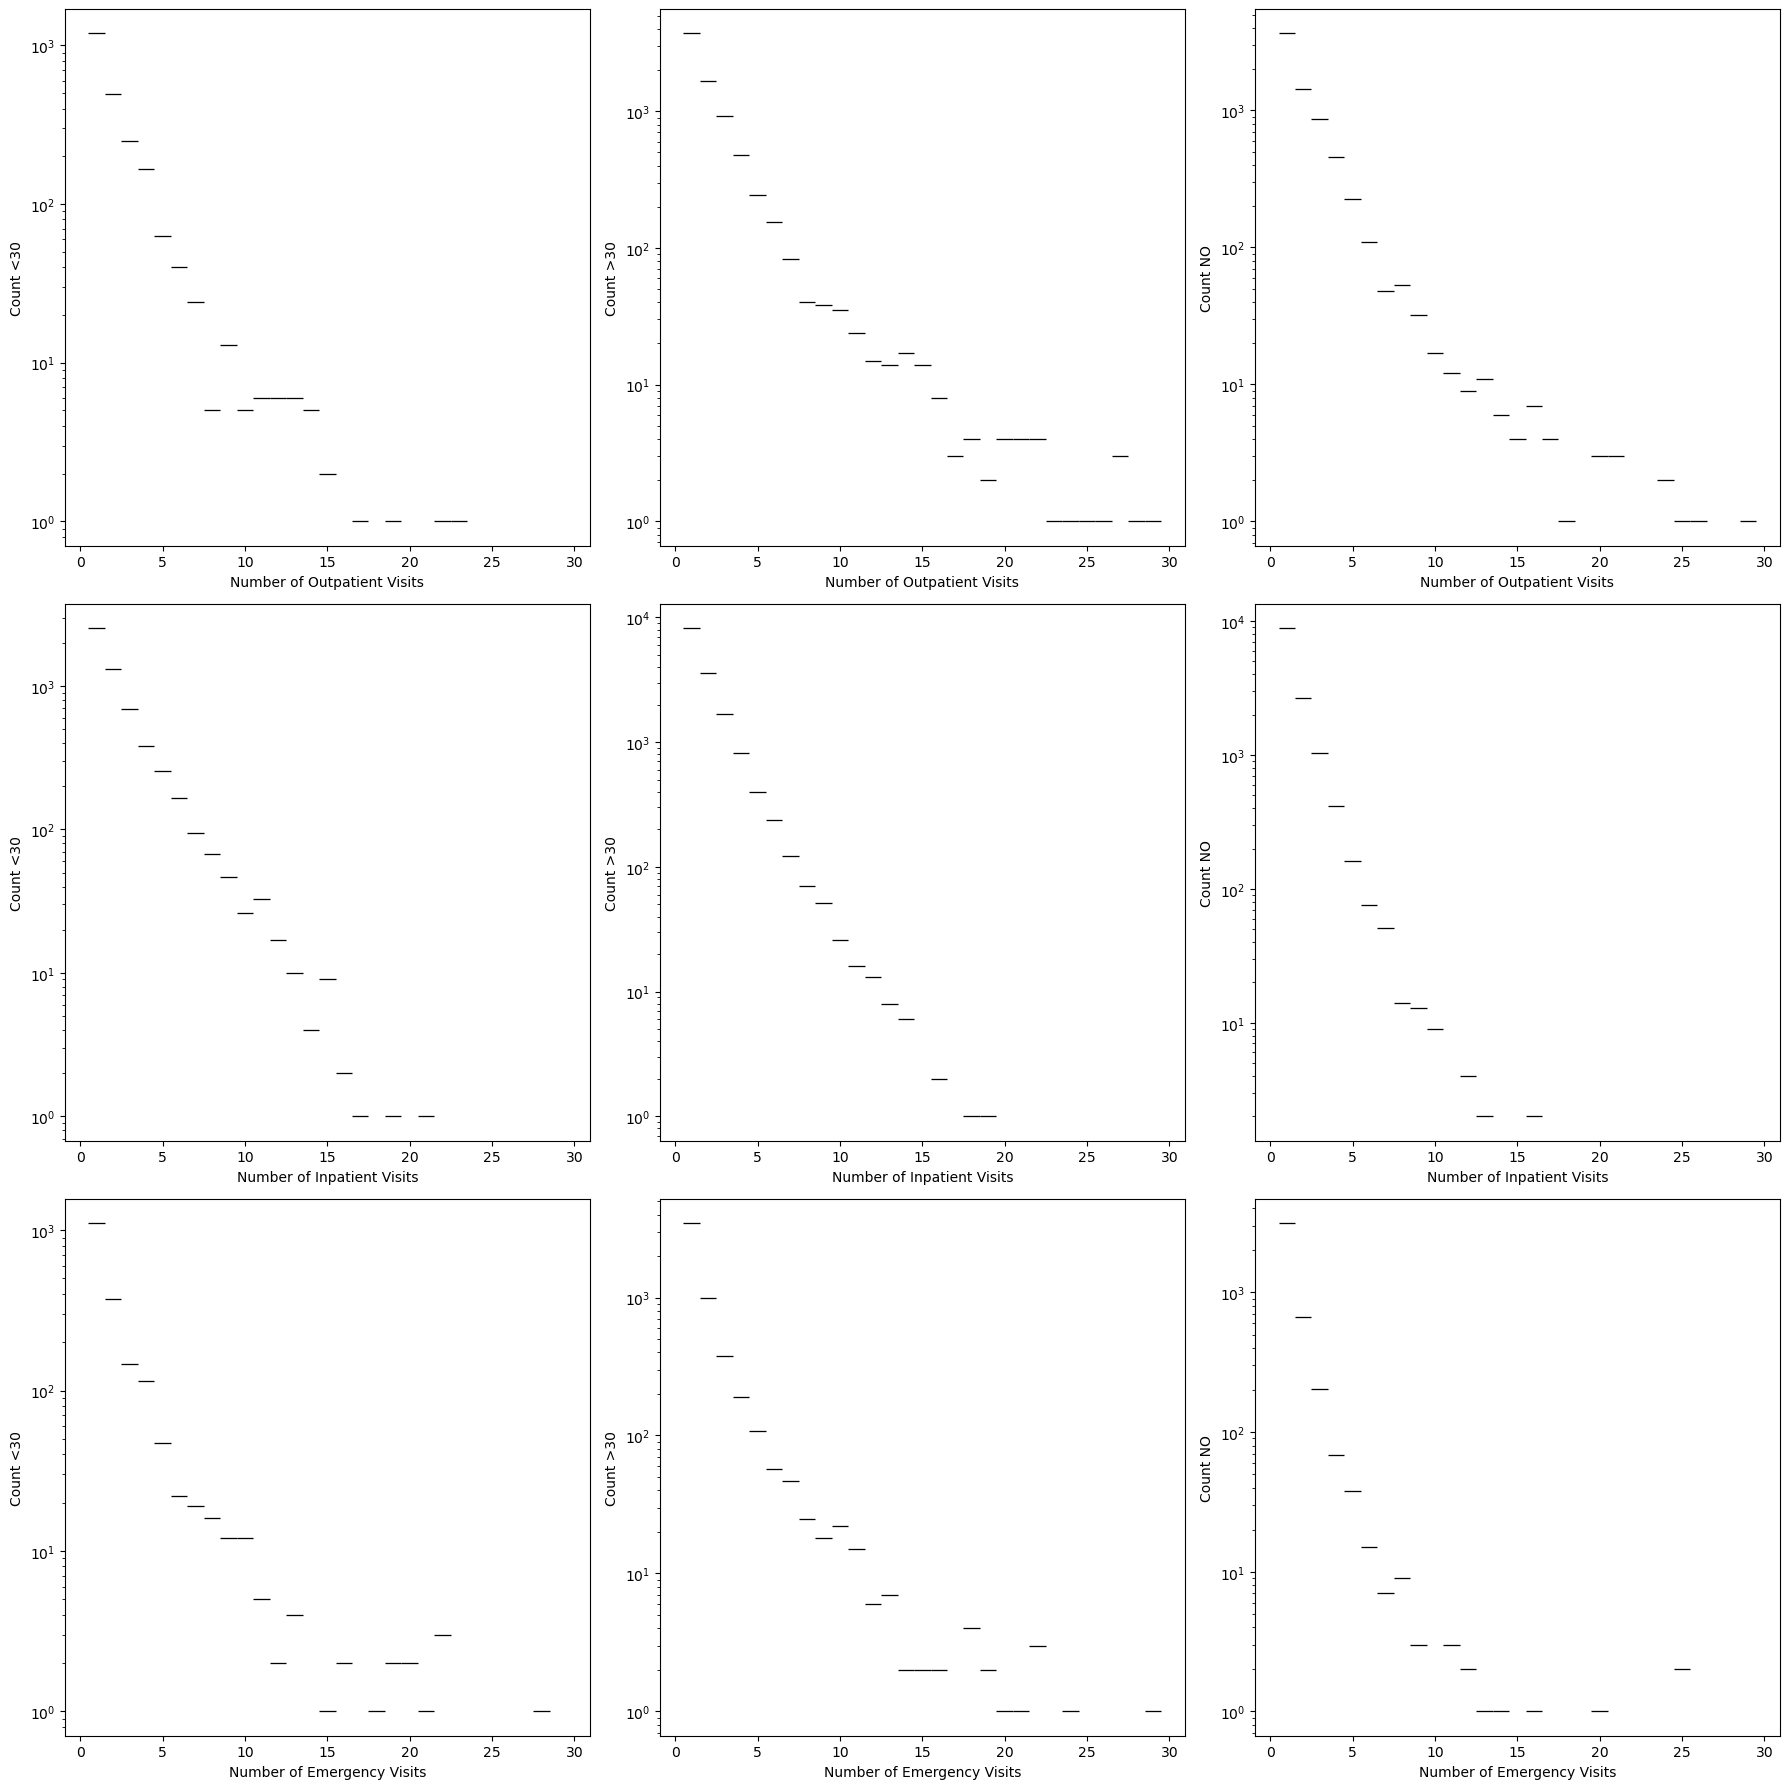

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

visit_types = ['number_outpatient', 'number_inpatient', 'number_emergency']
titles = ['Outpatient Visits', 'Inpatient Visits', 'Emergency Visits']
readmission_types = ['<30', '>30', 'NO']

# First melt the data
melted_data = data.melt(
    id_vars=['readmitted'],
    value_vars=['number_outpatient', 'number_inpatient', 'number_emergency'],
    var_name='visit_type',
    value_name='number_of_visits'
)

# Filter out zeros and top 5% in each visit type group
filtered_melted = melted_data

for i, visit_type in enumerate(visit_types):
    for j, readmission in enumerate(readmission_types):
        subset = filtered_melted[
            (filtered_melted['visit_type'] == visit_type) & 
            (filtered_melted['readmitted'] == readmission)
        ]
        # Set consistent bins from 1 to 30 with interval of 1
        bins = np.arange(0.5, 30.5, 1)
        sns.histplot(
            data=subset,
            x='number_of_visits',
            ax=axes[i,j],
            bins=bins,
            log_scale=(False, True)
        )
        
        axes[i,j].set_xlabel(f'Number of {titles[i]}', fontsize=10)
        axes[i,j].set_ylabel(f'Count {readmission_types[j]}', fontsize=10)

plt.tight_layout()
plt.show()

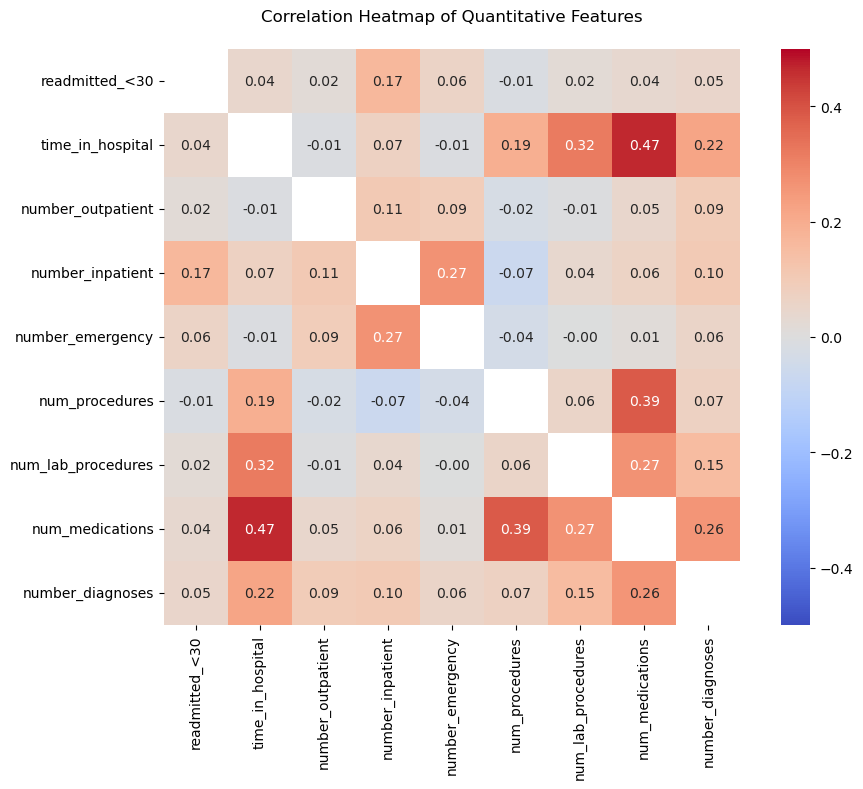

In [37]:
# Create correlation matrix for numeric columns including procedures, labs, and medications
numeric_cols = ['time_in_hospital',
                'number_outpatient', 'number_inpatient', 'number_emergency', 
                'num_procedures', 'num_lab_procedures', 'num_medications', 'number_diagnoses']

# Calculate correlation matrix
corr_matrix = pd.concat([targets_oh["readmitted_<30"], data[numeric_cols]], axis=1).corr()
# Create mask for diagonal
mask = np.eye(len(corr_matrix))

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            vmin=-0.5, 
            vmax=0.5,
            center=0,
            square=True,
            fmt='.2f')

plt.title('Correlation Heatmap of Quantitative Features', pad=20)
plt.tight_layout()
plt.show()


## Medications

In [43]:
# Get medication columns (rows 24-46 from variables table)
medication_cols = dataset.variables[dataset.variables["description"].str.startswith("The feature indicates whether the drug was prescribed")]["name"]

medications_bool = data[medication_cols].apply(lambda x: (x != 'No').astype(int))

In [44]:
med_usage = pd.DataFrame({
    "readmitted_<30": (medications_bool.mul(targets_oh["readmitted_<30"], axis=0)).sum(axis=0) / len(data) * 100,
    "readmitted_>30": (medications_bool.mul(targets_oh["readmitted_>30"], axis=0)).sum(axis=0) / len(data) * 100,
    "readmitted_NO": (medications_bool.mul(targets_oh["readmitted_NO"], axis=0)).sum(axis=0) / len(data) * 100
})

med_usage = med_usage.reindex(med_usage.sum(axis=1).sort_values(ascending=False).index)

<Figure size 1200x600 with 0 Axes>

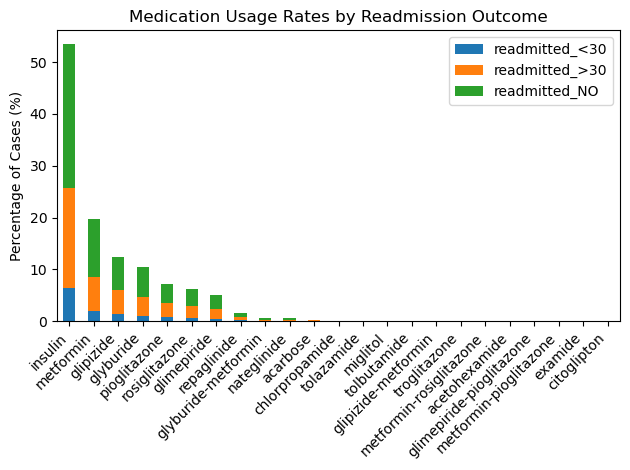

In [45]:
# Plot stacked bar chart
plt.figure(figsize=(12, 6))
med_usage.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Cases (%)')
plt.title('Medication Usage Rates by Readmission Outcome')
plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

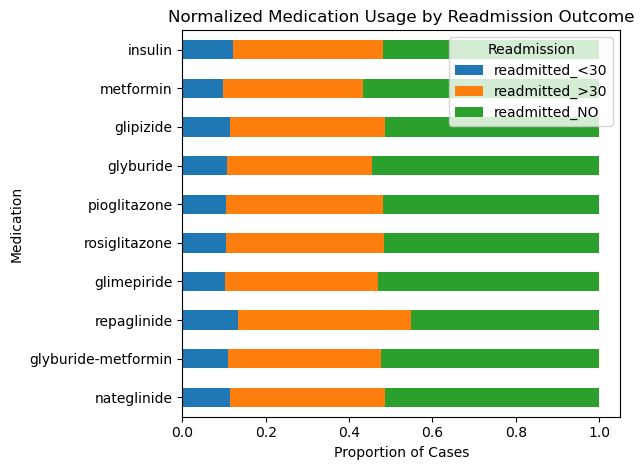

In [46]:
# Normalize medication usage to show relative proportions
med_usage_norm = med_usage.div(med_usage.sum(axis=1), axis=0)

# Take top 10 medications by total usage
med_norm_df = med_usage_norm.head(10)[::-1]

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
med_norm_df.plot(kind='barh', stacked=True)
plt.xlabel('Proportion of Cases')
plt.ylabel('Medication')
plt.title('Normalized Medication Usage by Readmission Outcome')
plt.legend(title='Readmission', loc='upper right')
plt.tight_layout()
plt.show();

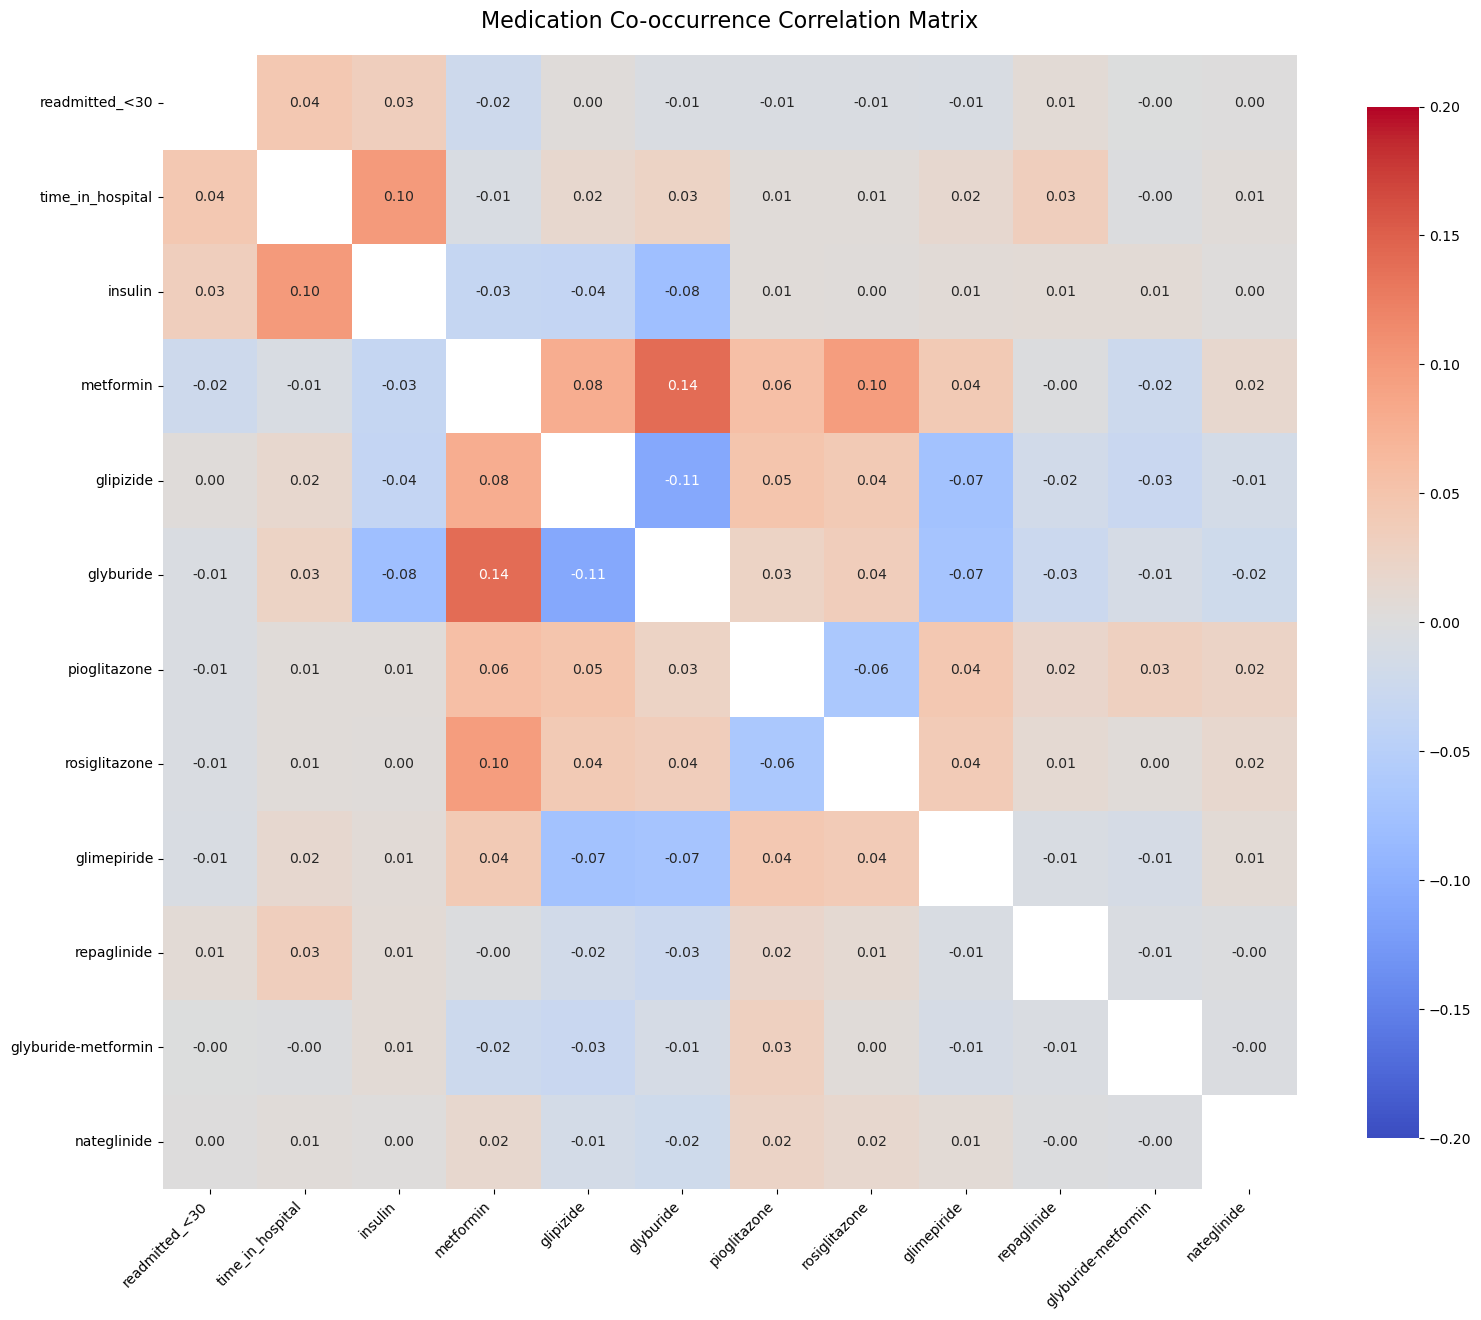

In [47]:

# Create correlation matrix
medication_corr_data = pd.concat([
    targets_oh["readmitted_<30"],
    data["time_in_hospital"],
    medications_bool[med_usage.index[:10]]
], axis=1)
corr_matrix = medication_corr_data.corr()

# Create heatmap
plt.figure(figsize=(16, 14))
mask = np.eye(len(corr_matrix))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, vmin=-0.2, vmax=0.2,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Medication Co-occurrence Correlation Matrix', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show();

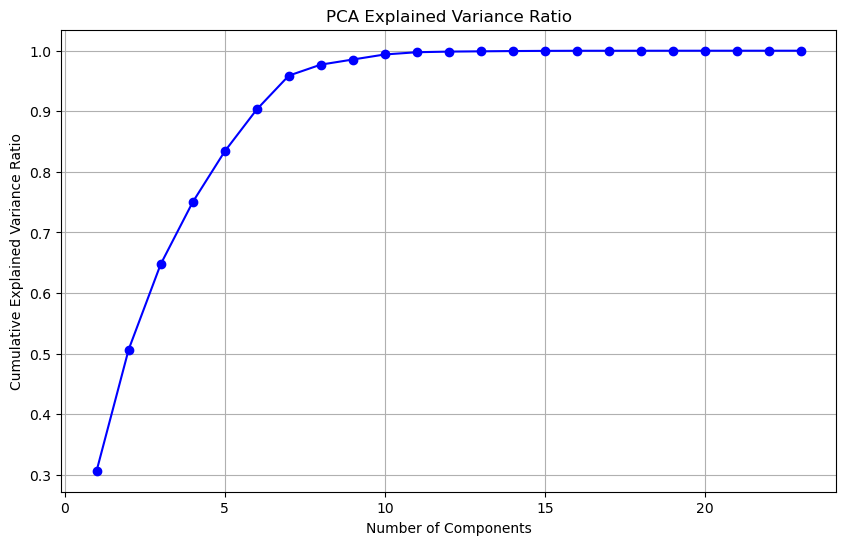

In [48]:
# Perform PCA on top 10 medications
from sklearn.decomposition import PCA

pca_medication_data = medications_bool[[med for med in med_usage.index]]

# Initialize and fit PCA
pca = PCA()
pca_result = pca.fit_transform(pca_medication_data)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()


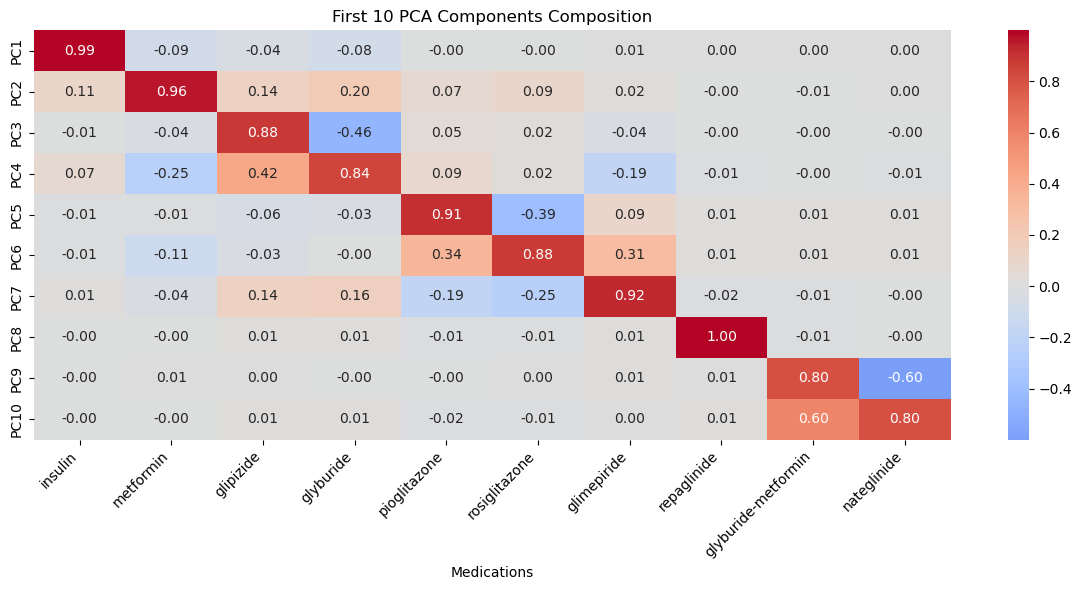

In [49]:
# Create a DataFrame with PCA components
pca_components = pd.DataFrame(
    pca.components_[:10,:10],  # Get first 10 components
    columns=med_usage.index[:10],
    index=[f'PC{i+1}' for i in range(10)]
)

# Plot heatmap of components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('First 10 PCA Components Composition')
plt.xlabel('Medications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Diagnosis

In [50]:
# Combine all unique diagnosis values from diag_1, diag_2, and diag_3
all_diag_categories = pd.concat([data["diag_1"], data["diag_2"], data["diag_3"]]).unique()
# Remove None/NaN values from categories
all_diag_categories = all_diag_categories[pd.notna(all_diag_categories)]
data["diag_1"] = pd.Categorical(data["diag_1"], categories=all_diag_categories)
data["diag_2"] = pd.Categorical(data["diag_2"], categories=all_diag_categories)
data["diag_3"] = pd.Categorical(data["diag_3"], categories=all_diag_categories)

In [51]:
diag_1_oh = pd.get_dummies(data["diag_1"], dtype=int)
diag_2_oh = pd.get_dummies(data["diag_2"], dtype=int)
diag_3_oh = pd.get_dummies(data["diag_3"], dtype=int)

# Combine diagnosis one-hot encodings with OR operation
diag_oh_combined = diag_1_oh | diag_2_oh | diag_3_oh

# Get the most frequent diagnosis
most_freq_diag = diag_oh_combined.sum().sort_values(ascending=False).index

In [52]:
# Create dataframe with patient numbers and diagnosis one-hot encodings
patient_diag_oh = pd.concat([data['patient_nbr'], diag_oh_combined], axis=1)

# Group by patient and combine using max (equivalent to OR for binary values)
patient_grouped_diag_oh = patient_diag_oh.groupby('patient_nbr').max()

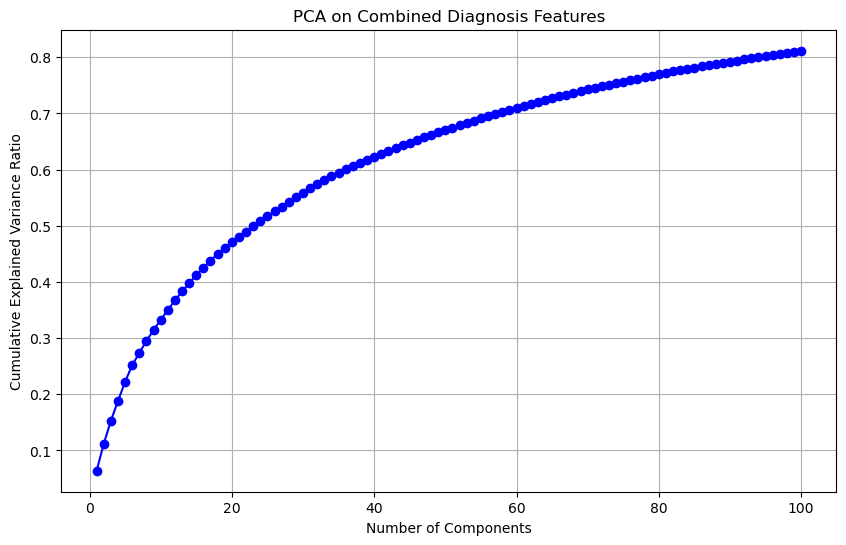

In [53]:
# Perform PCA on combined diagnosis one-hot encodings
pca = PCA()
diag_pca = pca.fit_transform(patient_grouped_diag_oh[most_freq_diag])

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100 + 1), np.cumsum(explained_var_ratio[:100]), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA on Combined Diagnosis Features')
plt.grid(True)
plt.show();

In [54]:
# Load ICD9 codes and create mapping series
icd9_labels = pd.read_csv('../data/ICD9.csv', index_col='code')['diag']

Source: 
- https://aspe.hhs.gov/sites/default/files/migrated_legacy_files//169931/icd-9-comparison-excel-file.csv
- https://docs.google.com/spreadsheets/d/1zq-_6fxeev0-6wo10qvnBHOsNm99a9Fe-EzJLLE4iCo/edit?usp=sharing

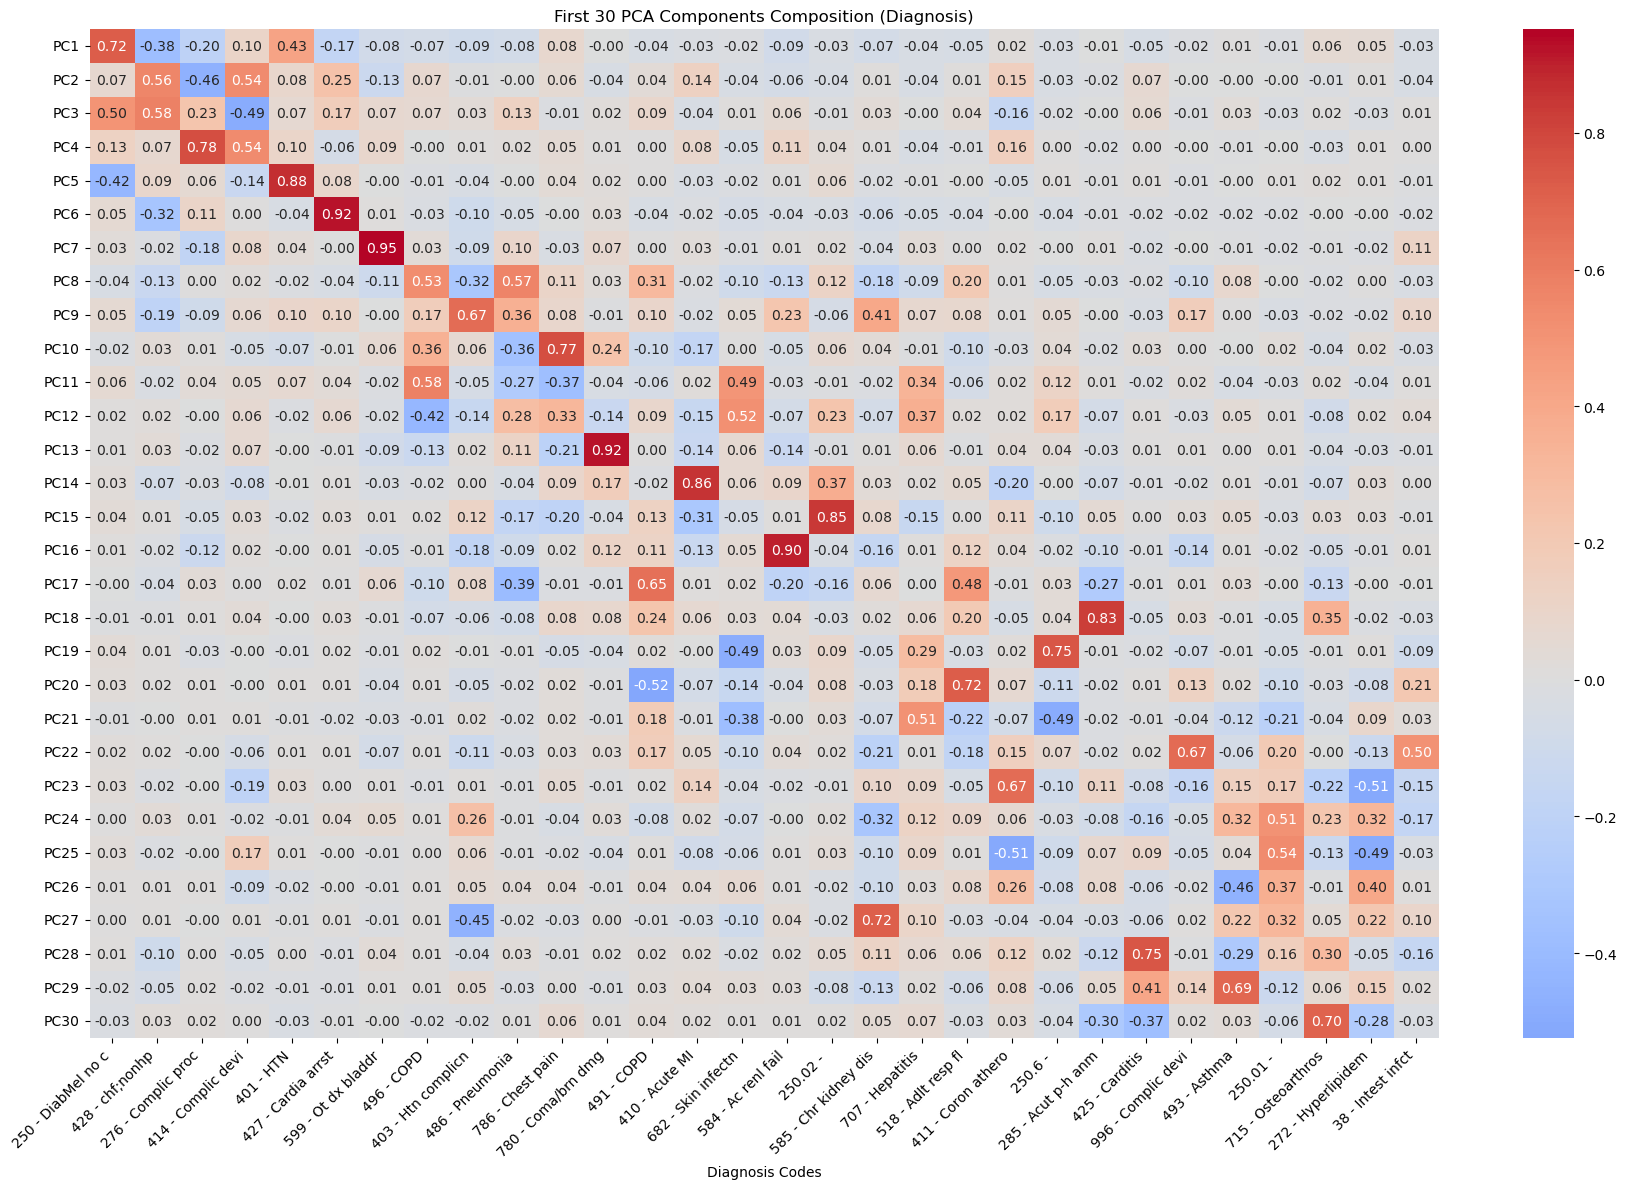

In [55]:
# Create DataFrame of first 30 PCA components
diag_pca_components = pd.DataFrame(
    pca.components_[:30,:30],  # Get first 30 components
    columns=most_freq_diag[:30],
    index=[f'PC{i+1}' for i in range(30)]
)
# Map diagnosis codes to labels, padding with zeros
diag_pca_components.columns = [f'{code} - {icd9_labels.get(code.zfill(3), "")}' for code in diag_pca_components.columns]

# Plot heatmap of components
plt.figure(figsize=(18, 12))
sns.heatmap(diag_pca_components, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('First 30 PCA Components Composition (Diagnosis)')
plt.xlabel('Diagnosis Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Lab Result

In [56]:
data["max_glu_serum"] = data["max_glu_serum"].astype('category')
data["A1Cresult"] = data["A1Cresult"].astype('category')

In [57]:
print(data["max_glu_serum"].cat.categories)
data["max_glu_serum"] = data["max_glu_serum"].cat.reorder_categories(['Norm', '>200', '>300'])

Index(['>200', '>300', 'Norm'], dtype='object')


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


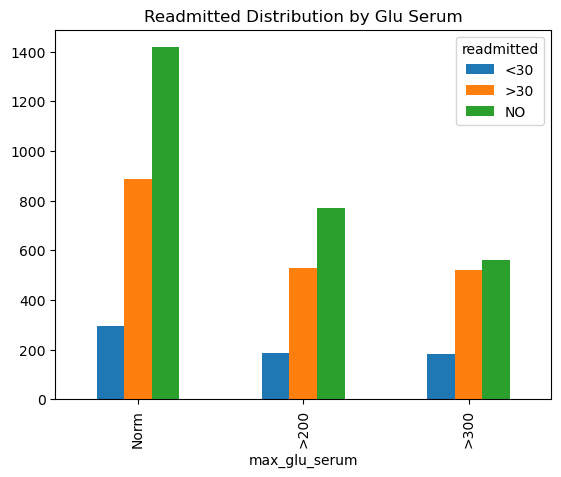

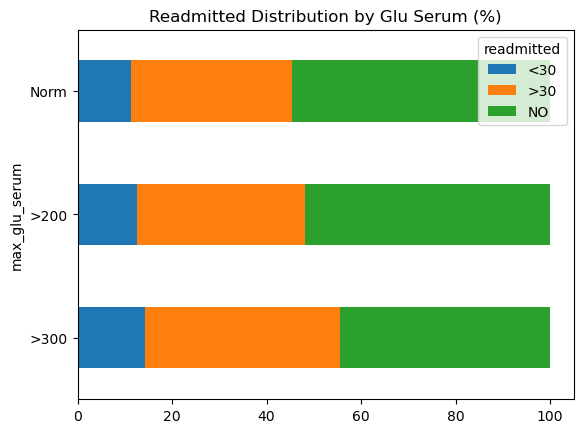

In [58]:
outcome_by_glu_serum = get_outcome_by_feature("max_glu_serum")
outcome_by_glu_serum.plot(kind="bar", title="Readmitted Distribution by Glu Serum")
outcome_by_glu_serum_pct = outcome_by_glu_serum.div(outcome_by_glu_serum.sum(axis=1), axis=0) * 100
outcome_by_glu_serum_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by Glu Serum (%)");

In [59]:
print(data["A1Cresult"].cat.categories)
data["A1Cresult"] = data["A1Cresult"].cat.reorder_categories(['Norm', '>7', '>8'])

Index(['>7', '>8', 'Norm'], dtype='object')


/var/folders/f4/31_68v2j2cv6d4n29813zycw0000gn/T/ipykernel_11813/2048430354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ) if patient_weighted else data.groupby(name)['readmitted'].value_counts().unstack(fill_value=0)


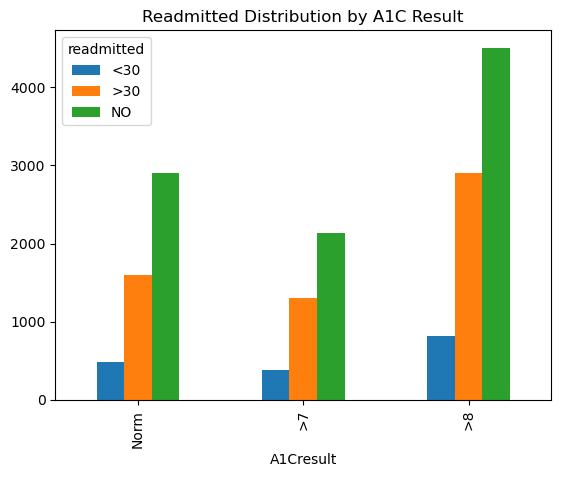

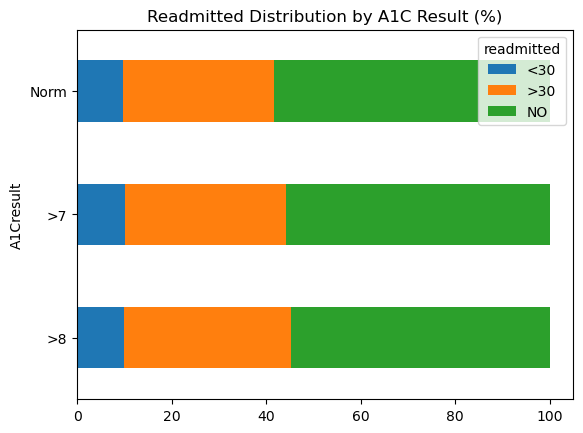

In [60]:
outcome_by_A1Cresult = get_outcome_by_feature("A1Cresult")
outcome_by_A1Cresult.plot(kind="bar", title="Readmitted Distribution by A1C Result")
outcome_by_A1Cresult_pct = outcome_by_A1Cresult.div(outcome_by_A1Cresult.sum(axis=1), axis=0) * 100
outcome_by_A1Cresult_pct.iloc[::-1].plot(kind="barh", stacked=True, title="Readmitted Distribution by A1C Result (%)");

In [61]:
def perform_chi_square_test(feature):
    """
    Perform chi-square test of independence between feature and readmission status
    """
    # Create contingency table
    contingency_table = pd.crosstab(
        data[feature], 
        data['readmitted']
    )
    
    # Perform chi-square test
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {feature} vs readmission status:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("Contingency table:")
    print(contingency_table.round().astype(int))
    print()
    
    return chi2, p_value, contingency_table

# Perform chi-square tests for lab results
for feature in ["max_glu_serum", "A1Cresult"]:
    perform_chi_square_test(feature)

Chi-square test for max_glu_serum vs readmission status:
Chi-square statistic: 35.1101
p-value: 0.0000
Degrees of freedom: 4
Contingency table:
readmitted     <30  >30    NO
max_glu_serum                
Norm           295  885  1417
>200           185  530   770
>300           181  521   562

Chi-square test for A1Cresult vs readmission status:
Chi-square statistic: 16.7850
p-value: 0.0021
Degrees of freedom: 4
Contingency table:
readmitted  <30   >30    NO
A1Cresult                  
Norm        482  1599  2909
>7          383  1300  2129
>8          811  2901  4504



## Mixed Model Analysis

In [38]:
# Fit mixed model to calculate ICC for length of stay predicted by past inpatient visits
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

test_predictors = ['number_inpatient', 'num_procedures', 'num_lab_procedures',
                   'num_medications', 'number_diagnoses', 'race', 'gender', 'age']

In [39]:
def compute_icc(data, outcome, predictor):
    exog = np.ones(len(data))
    if predictor is not  None:
        if isinstance(data[predictor].dtype, pd.CategoricalDtype) or data[predictor].dtype == object:
            if data[predictor].isna().any():
                if isinstance(data[predictor].dtype, pd.CategoricalDtype):
                    if 'Unknown' not in data[predictor].cat.categories:
                        data[predictor] = data[predictor].cat.add_categories('Unknown')
                    clean_data = data[predictor].fillna('Unknown')
                else:
                    clean_data = data[predictor].fillna('Unknown')
            else:
                clean_data = data[predictor]
            exog = pd.get_dummies(clean_data, drop_first=False, dtype=int)
        else:
            exog = sm.add_constant(data[predictor])

    model = MixedLM(
        endog=data[outcome],
        exog=exog,
        groups=data['patient_nbr'],
        exog_re=np.ones((len(exog), 1))
    )

    result = model.fit()
    random_effects = result.cov_re.iloc[0,0]  # Intercept variance
    residual = result.scale
    return random_effects / (random_effects + residual)

In [ ]:
def compute_full_model_icc(data, outcome, predictors):
    exog_components = []
    
    for predictor in predictors:
        if isinstance(data[predictor].dtype, pd.CategoricalDtype) or data[predictor].dtype == object:
            # Handle categorical variables
            if data[predictor].isna().any():
                if isinstance(data[predictor].dtype, pd.CategoricalDtype):
                    if 'Unknown' not in data[predictor].cat.categories:
                        data[predictor] = data[predictor].cat.add_categories('Unknown')
                    clean_data = data[predictor].fillna('Unknown')
                else:
                    clean_data = data[predictor].fillna('Unknown')
            else:
                clean_data = data[predictor]
            
            # Create dummy variables
            dummies = pd.get_dummies(clean_data, drop_first=True, dtype=int)
            exog_components.append(dummies)
            
        else:
            # Handle continuous variables
            continuous_data = data[predictor].fillna(data[predictor].mean())  # Fill with mean
            exog_components.append(continuous_data)
    
    # Concatenate all components
    if exog_components:
        exog = pd.concat(exog_components, axis=1)
    else:
        # If no predictors, use just intercept
        exog = pd.DataFrame({'const': np.ones(len(data))}, index=data.index)
    
    # Add constant for the intercept (if not already present from continuous variables)
    exog = sm.add_constant(exog)
    
    model = MixedLM(
        endog=data[outcome],
        exog=exog,
        groups=data['patient_nbr'],
        exog_re=np.ones((len(exog), 1))
    )
    
    result = model.fit()
    
    random_effects = result.cov_re.iloc[0,0]  # Intercept variance
    residual = result.scale
    
    return random_effects / (random_effects + residual)

In [ ]:
import pickle

# Initialize results dictionary
icc_results = {}

icc_results['NULL'] = compute_icc(data, 'time_in_hospital', None)

for predictor in test_predictors:
    icc_results[predictor] = compute_icc(data, 'time_in_hospital', predictor)

icc_results['FULL'] = compute_full_model_icc(data, 'time_in_hospital', test_predictors)

# Save ICC results to pickle file
with open('../src/assets/icc_results_los.pkl', 'wb') as f:
    pickle.dump(icc_results, f)

# Print results table
print("\nIntraclass Correlation Coefficients (ICC)")
print("=" * 50)
print("Model                  ICC")
print("-" * 50)
for model, icc in icc_results.items():
    print(f"{model:<20} {icc:.3f}")
print("\nThe ICC indicates what proportion of the variance in length of stay")
print("can be attributed to patient-level clustering")


Intraclass Correlation Coefficients (ICC)
Model                  ICC
--------------------------------------------------
NULL                 0.190
number_inpatient     0.183
num_procedures       0.219
num_lab_procedures   0.192
num_medications      0.250
number_diagnoses     0.194
race                 0.189
gender               0.189
age                  0.187
FULL                 0.230

The ICC indicates what proportion of the variance in length of stay
can be attributed to patient-level clustering


In [ ]:
# Initialize results dictionary
icc_results = {}

data_with_oh = pd.concat([targets_oh, data], axis=1)

icc_results['NULL'] = compute_icc(data_with_oh, 'readmitted_<30', None)

for predictor in test_predictors:
    icc_results[predictor] = compute_icc(data_with_oh, 'readmitted_<30', predictor)

icc_results['FULL'] = compute_full_model_icc(data_with_oh, 'readmitted_<30', test_predictors)

# Save ICC results to pickle file
with open('../src/assets/icc_results_readmitted.pkl', 'wb') as f:
    pickle.dump(icc_results, f)

# Print results table
print("\nIntraclass Correlation Coefficients (ICC)")
print("=" * 50)
print("Model                  ICC")
print("-" * 50)
for model, icc in icc_results.items():
    print(f"{model:<20} {icc:.3f}")
print("\nThe ICC indicates what proportion of the variance in readmitted < 30")
print("can be attributed to patient-level clustering")

/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniconda3/envs/it5006-group10/lib/python3.11/site-packages/statsmo


Intraclass Correlation Coefficients (ICC)
Model                  ICC
--------------------------------------------------
NULL                 0.070
number_inpatient     0.015
num_procedures       0.070
num_lab_procedures   0.070
num_medications      0.070
number_diagnoses     0.069
race                 0.070
gender               0.070
age                  0.070
FULL                 0.016

The ICC indicates what proportion of the variance in readmitted < 30
can be attributed to patient-level clustering
